In [1]:
import ROOT
import math
import pandas as pd
import numpy as np

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.cc","k")


def getNumVarsFromCode(code):
    nVars = 0
    while(code > 0):
        nVars += int(code%2)
        code = int(code/2)
    return nVars


def getTotalNumVars(modelName):
    splitted = modelName.split("_")
    numVars = getNumVarsFromCode(int(splitted[1].replace("df", "")))
    numVars += getNumVarsFromCode(int(splitted[2].replace("dl", "")))
    numVars += len(splitted) - 3
    if "opt" in modelName:
        numVars -= 1
    return numVars

modelNamePhi3 =     "BDTG_df13_dl3620_v0_v1_opt30000"
modelNameOmega =    "BDTG_df13_dl3620_v0_v1_opt30001"
modelNameD0Star2 =  "BDTG_df7_dl3684_v0_v1_opt30002"
modelNameD0Star3 =  "BDTG_df15_dl3684_v0_v1_opt30003"

s = '''
TMVA::Experimental::RReader modelScaleOmega0("/data/submit/pdmonte/TMVA_models/weightsOptsFinal/TMVARegression_{modelName}_{channel}_ggh_0.weights.xml");
computeModelScaleOmega0 = TMVA::Experimental::Compute<{numVarsTotal}, float>(modelScaleOmega0);
TMVA::Experimental::RReader modelScaleOmega1("/data/submit/pdmonte/TMVA_models/weightsOptsFinal/TMVARegression_{modelName}_{channel}_ggh_1.weights.xml");
computeModelScaleOmega1 = TMVA::Experimental::Compute<{numVarsTotal}, float>(modelScaleOmega1);
TMVA::Experimental::RReader modelScaleOmega2("/data/submit/pdmonte/TMVA_models/weightsOptsFinal/TMVARegression_{modelName}_{channel}_ggh_2.weights.xml");
computeModelScaleOmega2 = TMVA::Experimental::Compute<{numVarsTotal}, float>(modelScaleOmega2);
'''.format(modelName=modelNameOmega, channel="omega", numVarsTotal=getTotalNumVars(modelNameOmega))
s += '''
TMVA::Experimental::RReader modelScalePhi0("/data/submit/pdmonte/TMVA_models/weightsOptsFinal/TMVARegression_{modelName}_{channel}_ggh_0.weights.xml");
computeModelScalePhi0 = TMVA::Experimental::Compute<{numVarsTotal}, float>(modelScalePhi0);
TMVA::Experimental::RReader modelScalePhi1("/data/submit/pdmonte/TMVA_models/weightsOptsFinal/TMVARegression_{modelName}_{channel}_ggh_1.weights.xml");
computeModelScalePhi1 = TMVA::Experimental::Compute<{numVarsTotal}, float>(modelScalePhi1);
TMVA::Experimental::RReader modelScalePhi2("/data/submit/pdmonte/TMVA_models/weightsOptsFinal/TMVARegression_{modelName}_{channel}_ggh_2.weights.xml");
computeModelScalePhi2 = TMVA::Experimental::Compute<{numVarsTotal}, float>(modelScalePhi2);
'''.format(modelName=modelNamePhi3, channel="phi", numVarsTotal=getTotalNumVars(modelNamePhi3))
s += '''
TMVA::Experimental::RReader modelScaleD0Star0("/data/submit/pdmonte/TMVA_models/weightsOptsFinal/TMVARegression_{modelName}_{channel}_ggh_0.weights.xml");
computeModelScaleD0Star0 = TMVA::Experimental::Compute<{numVarsTotal}, float>(modelScaleD0Star0);
TMVA::Experimental::RReader modelScaleD0Star1("/data/submit/pdmonte/TMVA_models/weightsOptsFinal/TMVARegression_{modelName}_{channel}_ggh_1.weights.xml");
computeModelScaleD0Star1 = TMVA::Experimental::Compute<{numVarsTotal}, float>(modelScaleD0Star1);
TMVA::Experimental::RReader modelScaleD0Star2("/data/submit/pdmonte/TMVA_models/weightsOptsFinal/TMVARegression_{modelName}_{channel}_ggh_2.weights.xml");
computeModelScaleD0Star2 = TMVA::Experimental::Compute<{numVarsTotal}, float>(modelScaleD0Star2);
'''.format(modelName=modelNameD0Star2, channel="d0star", numVarsTotal=getTotalNumVars(modelNameD0Star2))
s += '''
TMVA::Experimental::RReader modelScaleD0StarRho0("/data/submit/pdmonte/TMVA_models/weightsOptsFinal/TMVARegression_{modelName}_{channel}_ggh_0.weights.xml");
computeModelScaleD0StarRho0 = TMVA::Experimental::Compute<{numVarsTotal}, float>(modelScaleD0StarRho0);
TMVA::Experimental::RReader modelScaleD0StarRho1("/data/submit/pdmonte/TMVA_models/weightsOptsFinal/TMVARegression_{modelName}_{channel}_ggh_1.weights.xml");
computeModelScaleD0StarRho1 = TMVA::Experimental::Compute<{numVarsTotal}, float>(modelScaleD0StarRho1);
TMVA::Experimental::RReader modelScaleD0StarRho2("/data/submit/pdmonte/TMVA_models/weightsOptsFinal/TMVARegression_{modelName}_{channel}_ggh_2.weights.xml");
computeModelScaleD0StarRho2 = TMVA::Experimental::Compute<{numVarsTotal}, float>(modelScaleD0StarRho2);
'''.format(modelName=modelNameD0Star3, channel="d0starrho", numVarsTotal=getTotalNumVars(modelNameD0Star3))
ROOT.gInterpreter.ProcessLine(s)
variablesOmega = list(ROOT.modelScaleOmega0.GetVariableNames())
variablesPhi = list(ROOT.modelScalePhi0.GetVariableNames())
variablesD0Star = list(ROOT.modelScaleD0Star0.GetVariableNames())
variablesD0StarRho = list(ROOT.modelScaleD0StarRho0.GetVariableNames())

Welcome to JupyROOT 6.28/00


Info in <TUnixSystem::ACLiC>: creating shared library /home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti_cc.so


In [35]:
date = "NOV05"
#ggH ----------------------------------------------------------------------------------------------------------------------------------
chainSGN_Phi3 = ROOT.TChain("events")
chainSGN_Omega = ROOT.TChain("events")
chainSGN_D0Star2 = ROOT.TChain("events")
chainSGN_D0Star3 = ROOT.TChain("events")
chainSGN_Phi3.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc{1}_GFcat_{2}_2018.root".format(date, 1039, "Phi3Cat"))
chainSGN_Omega.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc{1}_GFcat_{2}_2018.root".format(date, 1038, "OmegaCat"))
chainSGN_D0Star2.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc{1}_GFcat_{2}_2018.root".format(date, 1041, "D0StarCat"))
chainSGN_D0Star3.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc{1}_GFcat_{2}_2018.root".format(date, 1040, "D0StarRhoCat"))
dfSGN_Phi3 = ROOT.RDataFrame(chainSGN_Phi3)
dfSGN_Omega = ROOT.RDataFrame(chainSGN_Omega)
dfSGN_D0Star2 = ROOT.RDataFrame(chainSGN_D0Star2)
dfSGN_D0Star3 = ROOT.RDataFrame(chainSGN_D0Star3)


dfSGN_Omega = (dfSGN_Omega.Define("scale", "w*lumiIntegrated")
                .Define("genCandidates", "getAllPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, 223)")
                .Define("DRs", "getAllDRs(GenPart_eta, GenPart_phi, GenPart_pdgId, 223, goodMeson_eta[0], goodMeson_phi[0])"))

dfSGN_Phi3 = (dfSGN_Phi3.Define("scale", "w*lumiIntegrated")
                .Define("genCandidates", "getAllPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, 333)")
                .Define("DRs", "getAllDRs(GenPart_eta, GenPart_phi, GenPart_pdgId, 333, goodMeson_eta[0], goodMeson_phi[0])"))

dfSGN_D0Star2 = (dfSGN_D0Star2.Define("scale", "w*lumiIntegrated")
                .Define("genCandidates", "getAllPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, 421)")
                .Define("DRs", "getAllDRs(GenPart_eta, GenPart_phi, GenPart_pdgId, 421, goodMeson_eta[0], goodMeson_phi[0])"))

dfSGN_D0Star3 = (dfSGN_D0Star3.Define("scale", "w*lumiIntegrated")
                .Define("genCandidates", "getAllPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, 421)")
                .Define("DRs", "getAllDRs(GenPart_eta, GenPart_phi, GenPart_pdgId, 421, goodMeson_eta[0], goodMeson_phi[0])"))


#BKG ----------------------------------------------------------------------------------------------------------------------------------
chainBKG_Omega = ROOT.TChain("events")
chainBKG_Omega.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc10_GFcat_{1}_2018.root".format(date, "OmegaCat"))
chainBKG_Omega.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc11_GFcat_{1}_2018.root".format(date, "OmegaCat"))
chainBKG_Omega.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc12_GFcat_{1}_2018.root".format(date, "OmegaCat"))
chainBKG_Omega.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc13_GFcat_{1}_2018.root".format(date, "OmegaCat"))
chainBKG_Omega.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc14_GFcat_{1}_2018.root".format(date, "OmegaCat"))
dfBKG_Omega = ROOT.RDataFrame(chainBKG_Omega)

chainBKG_Phi3 = ROOT.TChain("events")
chainBKG_Phi3.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc10_GFcat_{1}_2018.root".format(date, "Phi3Cat"))
chainBKG_Phi3.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc11_GFcat_{1}_2018.root".format(date, "Phi3Cat"))
chainBKG_Phi3.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc12_GFcat_{1}_2018.root".format(date, "Phi3Cat"))
chainBKG_Phi3.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc13_GFcat_{1}_2018.root".format(date, "Phi3Cat"))
chainBKG_Phi3.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc14_GFcat_{1}_2018.root".format(date, "Phi3Cat"))
dfBKG_Phi3 = ROOT.RDataFrame(chainBKG_Phi3)

chainBKG_D0Star2 = ROOT.TChain("events")
chainBKG_D0Star2.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc10_GFcat_{1}_2018.root".format(date, "D0StarCat"))
chainBKG_D0Star2.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc11_GFcat_{1}_2018.root".format(date, "D0StarCat"))
chainBKG_D0Star2.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc12_GFcat_{1}_2018.root".format(date, "D0StarCat"))
chainBKG_D0Star2.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc13_GFcat_{1}_2018.root".format(date, "D0StarCat"))
chainBKG_D0Star2.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc14_GFcat_{1}_2018.root".format(date, "D0StarCat"))
dfBKG_D0Star2 = ROOT.RDataFrame(chainBKG_D0Star2)

chainBKG_D0Star3 = ROOT.TChain("events")
chainBKG_D0Star3.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc10_GFcat_{1}_2018.root".format(date, "D0StarRhoCat"))
chainBKG_D0Star3.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc11_GFcat_{1}_2018.root".format(date, "D0StarRhoCat"))
chainBKG_D0Star3.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc12_GFcat_{1}_2018.root".format(date, "D0StarRhoCat"))
chainBKG_D0Star3.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc13_GFcat_{1}_2018.root".format(date, "D0StarRhoCat"))
chainBKG_D0Star3.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc14_GFcat_{1}_2018.root".format(date, "D0StarRhoCat"))
dfBKG_D0Star3 = ROOT.RDataFrame(chainBKG_D0Star3)


dfBKG_Omega = (dfBKG_Omega.Define("scale", "w*lumiIntegrated")
                .Define("scaleFactor0", ROOT.computeModelScaleOmega0, variablesOmega)
                .Define("scaleFactor1", ROOT.computeModelScaleOmega1, variablesOmega)
                .Define("scaleFactor2", ROOT.computeModelScaleOmega2, variablesOmega)
                .Define("goodMeson_pt_PRED", "(scaleFactor0[0]*goodMeson_pt[0] + scaleFactor1[0]*goodMeson_pt[0] + scaleFactor2[0]*goodMeson_pt[0])/3")
                .Define("HCandMass_varPRED", "compute_HiggsVars_var(goodMeson_pt_PRED, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
                .Define("goodMeson_mass_BKG", "getValuesIdParticleDR(goodMeson_mass, GenPart_eta, GenPart_phi, GenPart_pdgId, 223, goodMeson_eta[0], goodMeson_phi[0], 0.10, 1)")
                .Define("goodMeson_mass_noBKG", "getValuesIdParticleDR(goodMeson_mass, GenPart_eta, GenPart_phi, GenPart_pdgId, 223, goodMeson_eta[0], goodMeson_phi[0], 0.10, 0)")
                .Define("genCandidates", "getAllPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, 223)")
                .Define("DRs", "getAllDRs(GenPart_eta, GenPart_phi, GenPart_pdgId, 223, goodMeson_eta[0], goodMeson_phi[0])"))
dfBKG_Phi3 = (dfBKG_Phi3.Define("scale", "w*lumiIntegrated")
                .Define("scaleFactor0", ROOT.computeModelScalePhi0, variablesPhi)
                .Define("scaleFactor1", ROOT.computeModelScalePhi1, variablesPhi)
                .Define("scaleFactor2", ROOT.computeModelScalePhi2, variablesPhi)
                .Define("goodMeson_pt_PRED", "(scaleFactor0[0]*goodMeson_pt[0] + scaleFactor1[0]*goodMeson_pt[0] + scaleFactor2[0]*goodMeson_pt[0])/3")
                .Define("HCandMass_varPRED", "compute_HiggsVars_var(goodMeson_pt_PRED, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
                .Define("goodMeson_mass_BKG", "getValuesIdParticleDR(goodMeson_mass, GenPart_eta, GenPart_phi, GenPart_pdgId, 333, goodMeson_eta[0], goodMeson_phi[0], 0.10, 1)")
                .Define("goodMeson_mass_noBKG", "getValuesIdParticleDR(goodMeson_mass, GenPart_eta, GenPart_phi, GenPart_pdgId, 333, goodMeson_eta[0], goodMeson_phi[0], 0.10, 0)")
                .Define("genCandidates", "getAllPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, 333)")
                .Define("DRs", "getAllDRs(GenPart_eta, GenPart_phi, GenPart_pdgId, 333, goodMeson_eta[0], goodMeson_phi[0])"))
dfBKG_D0Star2 = (dfBKG_D0Star2.Define("scale", "w*lumiIntegrated")
                .Define("scaleFactor0", ROOT.computeModelScaleD0Star0, variablesD0Star)
                .Define("scaleFactor1", ROOT.computeModelScaleD0Star1, variablesD0Star)
                .Define("scaleFactor2", ROOT.computeModelScaleD0Star2, variablesD0Star)
                .Define("goodMeson_pt_PRED", "(scaleFactor0[0]*goodMeson_pt[0] + scaleFactor1[0]*goodMeson_pt[0] + scaleFactor2[0]*goodMeson_pt[0])/3")
                .Define("HCandMass_varPRED", "compute_HiggsVars_var(goodMeson_pt_PRED, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
                .Define("goodMeson_mass_BKG", "getValuesIdParticleDR(goodMeson_ditrk_mass, GenPart_eta, GenPart_phi, GenPart_pdgId, 421, goodMeson_eta[0], goodMeson_phi[0], 0.10, 1)")
                .Define("goodMeson_mass_noBKG", "getValuesIdParticleDR(goodMeson_ditrk_mass, GenPart_eta, GenPart_phi, GenPart_pdgId, 421, goodMeson_eta[0], goodMeson_phi[0], 0.10, 0)")
                .Define("genCandidates", "getAllPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, 421)")
                .Define("DRs", "getAllDRs(GenPart_eta, GenPart_phi, GenPart_pdgId, 421, goodMeson_eta[0], goodMeson_phi[0])"))
dfBKG_D0Star3 = (dfBKG_D0Star3.Define("scale", "w*lumiIntegrated")
                .Define("scaleFactor0", ROOT.computeModelScaleD0StarRho0, variablesD0StarRho)
                .Define("scaleFactor1", ROOT.computeModelScaleD0StarRho1, variablesD0StarRho)
                .Define("scaleFactor2", ROOT.computeModelScaleD0StarRho2, variablesD0StarRho)
                .Define("goodMeson_pt_PRED", "(scaleFactor0[0]*goodMeson_pt[0] + scaleFactor1[0]*goodMeson_pt[0] + scaleFactor2[0]*goodMeson_pt[0])/3")
                .Define("HCandMass_varPRED", "compute_HiggsVars_var(goodMeson_pt_PRED, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
                .Define("goodMeson_mass_BKG", "getValuesIdParticleDR(goodMeson_mass, GenPart_eta, GenPart_phi, GenPart_pdgId, 421, goodMeson_eta[0], goodMeson_phi[0], 0.10, 1)")
                .Define("goodMeson_mass_noBKG", "getValuesIdParticleDR(goodMeson_mass, GenPart_eta, GenPart_phi, GenPart_pdgId, 421, goodMeson_eta[0], goodMeson_phi[0], 0.10, 0)")
                .Define("genCandidates", "getAllPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, 421)")
                .Define("DRs", "getAllDRs(GenPart_eta, GenPart_phi, GenPart_pdgId, 421, goodMeson_eta[0], goodMeson_phi[0])"))

In [45]:
dfSGN = dfSGN_D0Star2
dfBKG = dfBKG_D0Star2

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


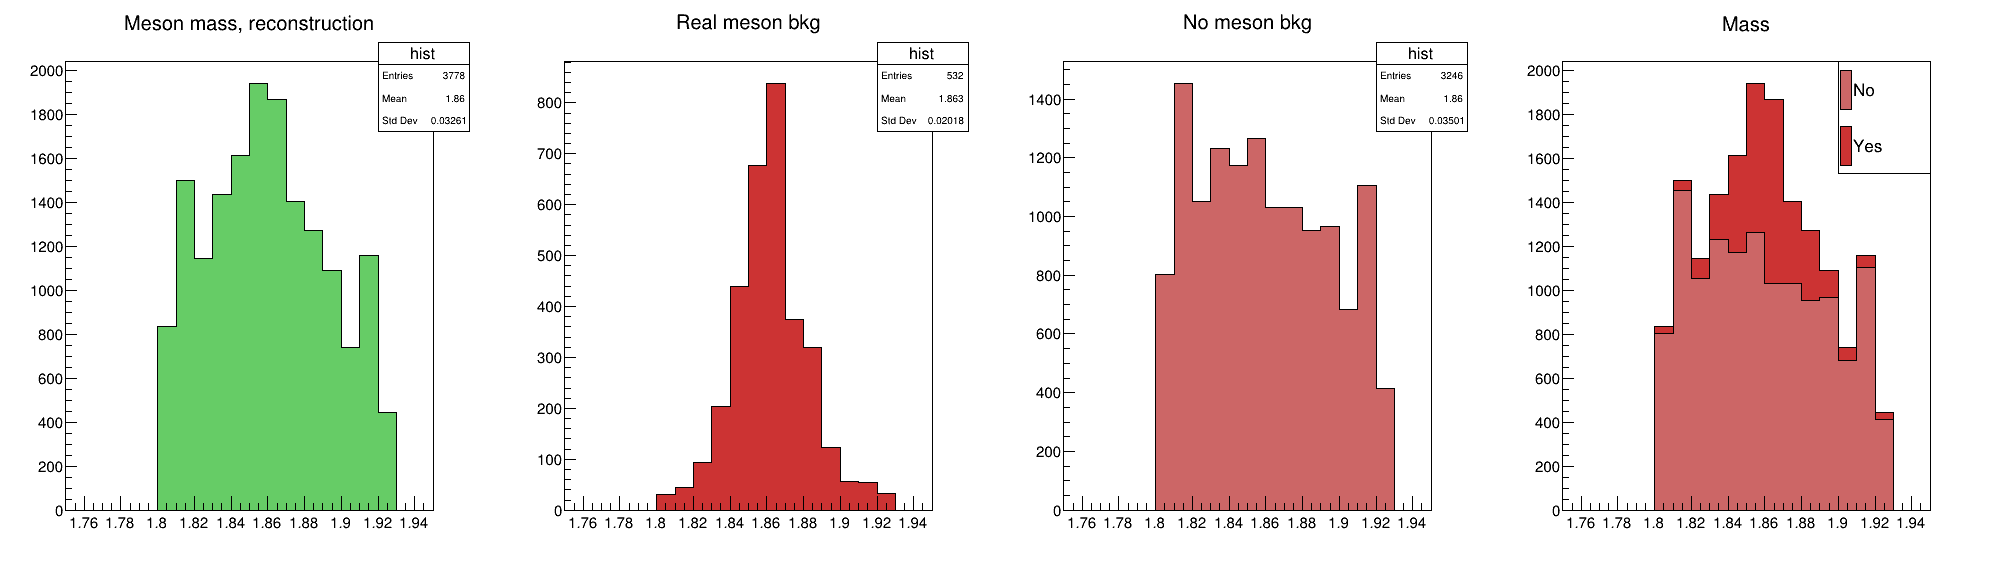

In [52]:
canvas = ROOT.TCanvas("canvas", "canvas", 2000, 600)
canvas.Divide(4, 1)

nbins, xlow, xhigh = 15, 1.78, 1.95
#nbins, xlow, xhigh = 30, 0.55, 0.95
nbins, xlow, xhigh = 20, 1.75, 1.95

hTOT = dfBKG.Histo1D(("hist", "Meson mass, reconstruction", nbins, xlow, xhigh), "goodMeson_ditrk_mass", "scale").GetValue()
hYE = dfBKG.Histo1D(("hist", "Real meson bkg", nbins, xlow, xhigh), "goodMeson_mass_BKG", "scale").GetValue()
hNO = dfBKG.Histo1D(("hist", "No meson bkg", nbins, xlow, xhigh), "goodMeson_mass_noBKG", "scale").GetValue()


hTOT.SetFillColor(ROOT.kGreen-6)
hTOT.SetLineColor(ROOT.kBlack)
hYE.SetFillColor(ROOT.kRed-3)
hYE.SetLineColor(ROOT.kBlack)
hNO.SetFillColor(ROOT.kRed-6)
hNO.SetLineColor(ROOT.kBlack)

canvas.cd(1)
hTOT.Draw("hist")
canvas.cd(2)
hYE.Draw("hist")
canvas.cd(3)
hNO.Draw("hist")
canvas.cd(4)

stack4 = ROOT.THStack("stack", "Mass")
stack4.Add(hNO)
stack4.Add(hYE)
stack4.Draw("hist")
legend4 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend4.SetMargin(0.17)
#legend.SetBorderSize(0)
legend4.SetTextSize(0.04)
legend4.AddEntry(hNO, "No", "f")
legend4.AddEntry(hYE, "Yes", "f")
legend4.Draw()


canvas.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


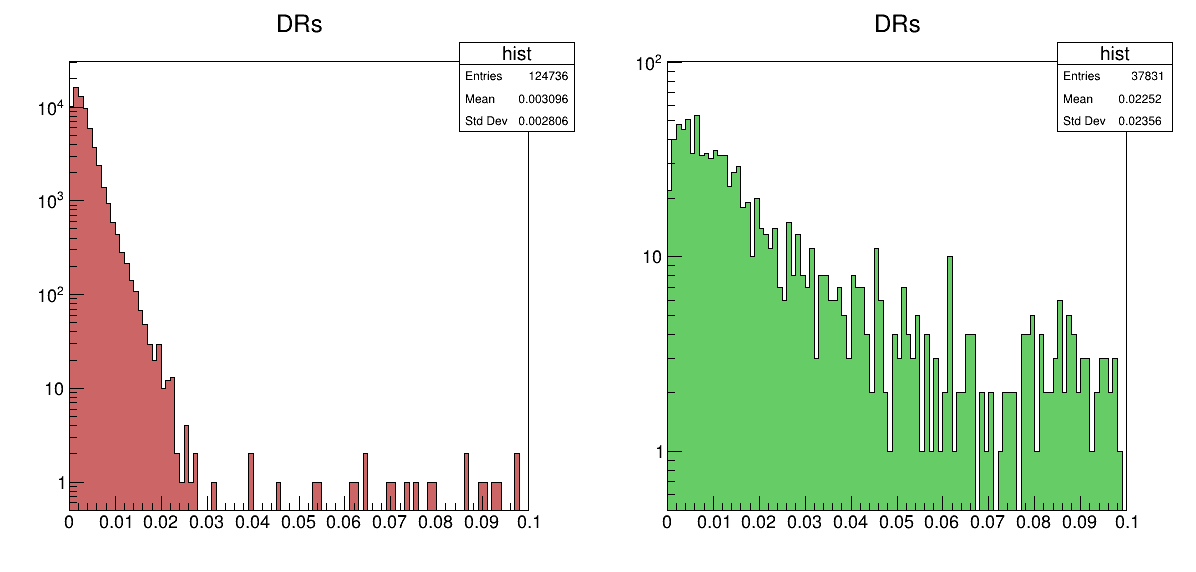

In [43]:
dfSGN = dfSGN_Phi3
dfBKG = dfBKG_Phi3

canvas = ROOT.TCanvas("canvas", "canvas", 1200, 600)
canvas.Divide(2, 1)

nbins, xlow, xhigh = 100, 0.0, 0.10

hTOTSgn = dfSGN.Histo1D(("hist", "DRs", nbins, xlow, xhigh), "DRs").GetValue()
hTOTSgn.SetFillColor(ROOT.kRed-6)
hTOTSgn.SetLineColor(ROOT.kBlack)

hTOTBkg = dfBKG.Histo1D(("hist", "DRs", nbins, xlow, xhigh), "DRs").GetValue()
hTOTBkg.SetFillColor(ROOT.kGreen-6)
hTOTBkg.SetLineColor(ROOT.kBlack)


p = canvas.cd(1)
hTOTSgn.Draw("hist")
p.SetLogy()

p = canvas.cd(2)
hTOTBkg.Draw("hist")
p.SetLogy()

canvas.Draw()

In [6]:
cols = ["genCandidates", "DRs", "goodMeson_eta", "goodMeson_phi"]
x = dfBKG.Filter("DRs.size() == 1").Filter("DRs[0] < 0.01").Filter("DRs[0] < 3.3").AsNumpy(columns=cols)
pddf_BKG = pd.DataFrame(x)
display(pddf_BKG)


,genCandidates,DRs,goodMeson_eta,goodMeson_phi
0,"[(42.3255,0.519518,-1.16379,1.01873)]",[0.007705733645707369],[0.5199573636054993],[-1.1560924053192139]
1,"[(43.8312,0.604017,1.09863,1.01842)]",[0.0009764614515006542],[0.6044877171516418],[1.0994877815246582]
2,"[(25.5703,-0.937139,-0.693709,1.02382)]",[0.004988830536603928],[-0.9328259229660034],[-0.6912016272544861]
3,"[(26.9768,-0.57254,-2.24263,1.01705)]",[0.007590998895466328],[-0.5708717703819275],[-2.235224485397339]
4,"[(27.5782,1.28763,-1.52791,1.01902)]",[0.009234452620148659],[1.2792949676513672],[-1.5318790674209595]
...,...,...,...,...
138,"[(47.8147,0.29559,0.566629,1.02351)]",[0.00723651610314846],[0.30207088589668274],[0.5634090304374695]
139,"[(11.4188,1.79726,0.179562,1.02566)]",[0.007908749394118786],[1.7894428968429565],[0.17838966846466064]
140,"[(145.82,0.146541,-0.201264,1.02161)]",[0.003116294974461198],[0.14824475347995758],[-0.19865478575229645]
141,"[(33.9609,-0.471484,2.81869,1.01663)]",[0.002095126546919346],[-0.47165587544441223],[2.816603422164917]
